In [18]:
from sympy import *

# Método de Newton

É um caso da Iteração Linear

Ordem de convergência = quadrática (p = 20)

Critério de parada: x - x0 = Δx < tol
(tol = erro tolerável)

Digamos que $$ f(x) = \frac {e^x} {2} - 2 * \sin(x) $$
Sua derivada é $$ f'(x) = \frac {e^x} {2} - 2 * \cos(x) $$

0.5*exp(x) - 2*cos(x)


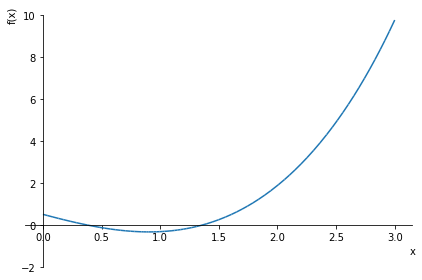

In [19]:
x = symbols("x")
def f(x):
    return (1/2)*(E**x) - 2 * sin(x)

print(diff(f(x), x))

def fl(x):
    return (1/2)*(E**x) - 2 * cos(x)

plot(f(x), (x,0,3), ylim=[-2,10])

Como no método da iteração linear, precisamos de um chute inicial x0, digamos, 3.

Sabendo a derivada de f(x), e o valor de f(3), traçamos a reta tangente ao ponto no gráfico, cuja formula é sabida:

$$ y - f(x_0) = f'(x_0) * (x_1 - x_0) $$

$$ y - f(3) = f'(3) * (x_1 - 3) $$

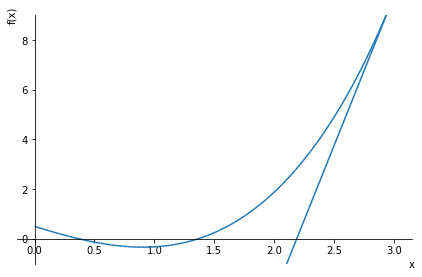

In [20]:
plot(f(x), (fl(3) * (x - 3) + f(3)), (x,0,3), ylim=[-1,9])

Note que a reta plotada volta a atingir o eixo X. Para encontrarmos o valor onde a reta atinge o eixo X basta igualar y a 0 (zero) na equação da reta e então isolar o X:

$$ y - f(x_0) = f'(x_0) * (x_1 - x_0) $$
$$ 0 - f(x_0) = f'(x_0) * (x_1 - x_0) $$
$$ x_1 = x_0 - \frac {f(x_0)} {f'(x_0)} $$

O método de Newton reaplica o processo para novo x1 encontrado, o que vai aproximando seu valor da raiz real.

Note que, dependendo do chute inicial, a reta tangente ao gráfico cortará o eixo X muito longe do chute. Não é garantido que a raiz encontrada pelo método seja a mais próxima. 

In [21]:
def newton_method(f, fl, err, x0):
    nf = 100
    
    #for para controle do num de iterações
    for _ in range(nf):
        x = x0 - N( f(x0) / fl(x0) )
        
        if(abs(x - x0) < err):
            return x
        
        x0 = x
    print("O método atingiu o limite máximo de iterações ", nf)

In [22]:
#igual ao método de newton, mas utiliza uma aproximação diferente no lugar da derivada
def f(x):
  return 0.916290731874155*(0.8 + 2/x)/0.4**x - 2/(0.4**x*x**2);

def secant_method(f, err, x0, x1):
    nf = 100
    
    f0 = f(x0)
    f1 = f(x1)
    
    #for para controle do num de iterações
    for _ in range(nf):
        x = N((x0 * f1 - x1 * f0) / (f1 - f0))
#         print(x)
        
        if(abs(x - x1) < err):
            return x
        
        x0 = x1
        f0 = f1
        x1 = x
        f1 = f(x1)
    print("O método atingiu o limite máximo de iterações ", nf)

In [23]:
print(secant_method(f, 0.01, 3,4));

0.822291517267914


In [24]:
newton_method(f, fl, 0.0001, 3)

O método atingiu o limite máximo de iterações  100


In [25]:
#Como a função em questão tem infinitas raizes, as vezes podem haver saltos grandes
#-25 também é um raiz, está tudo certo
newton_method(f, fl, 0.0001, 0.9)

O método atingiu o limite máximo de iterações  100
